# World Happiness Report

### A study of happiness across the globe

The annual World Happiness Report has been published since 2012, and it ranks 156 countries by how happy their citizens perceive themselves to be. The report looks at six key variables that affect the happiness scores: income, freedom, trust in government, healthy life expectancy, social support from family and friends, and generosity.

This global data on happiness has the potential to inform policies and decision making on a national level, as well as provide valuable insights to companies looking to solve such questions as employee retention or fostering a people centric culture.


<img src="https://media.giphy.com/media/pyFptfxaSke3wisfnj/giphy.gif" width="395" align="center">


In [1]:
#Essential imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#Missing Data
import missingno as msno

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#Missing Data
import missingno as msno

First, I will import the datasets and check the data for missing values. I am using the data from the World Happiness Report for 2015, 2016 and 2017 years.

In [2]:
df = pd.read_csv('./2015.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df_1 = pd.read_csv('./2016.csv')
df_1

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [4]:
df_2 = pd.read_csv('./2017.csv')
df_2

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [5]:
def missing_values(dataframe):
    if dataframe.isnull().sum().sum() == 0:
        return 'This dataframe has no missing values'
    else:
        number_of_missing_values = dataframe.isna().sum()
        return number_of_missing_values

In [6]:
missing_values(df)

'This dataframe has no missing values'

In [7]:
missing_values(df_1)

'This dataframe has no missing values'

In [8]:
missing_values(df_2)

'This dataframe has no missing values'

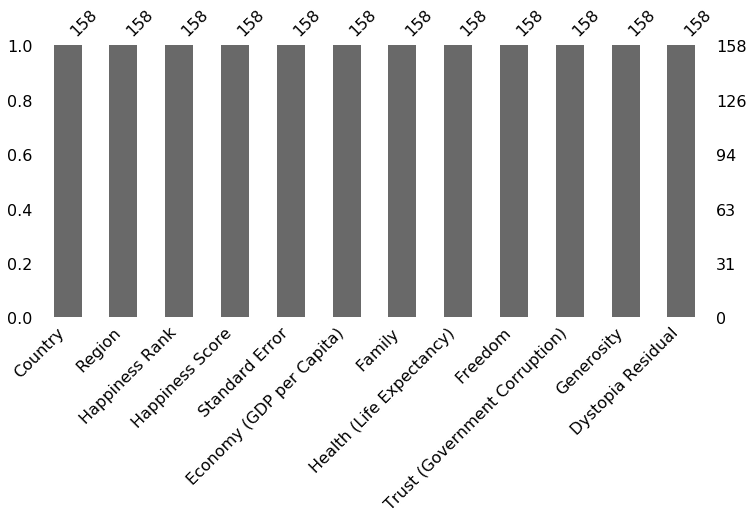

In [9]:
msno.bar(df, figsize=(12,5))
plt.show()

In order to merge these three dataframes, the structure of the dataframes has to be similar. I have to validate the data types, the order and the number of columns, and ensure the column names match. 

After checking the data types and running df.shape(), df.info(), df.head(), df.value_counts() for all three dataframes, I found the following:<br/>
(1) there are three columns that do not match among all three files - these columns would have to be removed to ensure the data structure is similar. <br/>
(2) the columns in the 2017.csv have to be renamed. <br/>
(3) the dataset for 2017 is missing the column 'Region'. We will have to add it back prior to merging the dataframes.<br/>
<br/>
I will also create a new column 'Year' to be included in the merged dataframe.

In [10]:
# Viewing countries withith a certain region
df[df['Region'] == 'Sub-Saharan Africa'].sort_values(by='Happiness Score', ascending=False).head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
70,Mauritius,Sub-Saharan Africa,71,5.477,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [14]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
df_1.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [16]:
df_2.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


Dataframe names: df is 2015, df_1 is 2016, and df_2 is 2017 data.

In [17]:
df.shape

(158, 12)

In [18]:
df_1.shape

(157, 13)

In [19]:
df_2.shape

(155, 12)

In [20]:
# Create a column 'Year' for the merged dataframe 
df['Year'] = '2015'
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [21]:
df.drop(columns = ['Standard Error'], inplace = True)
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [22]:
df_1['Year'] = '2016'
df_1

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [23]:
df_1.drop(columns = ['Lower Confidence Interval'], inplace = True)
df_1

,Country,Region,Happiness Rank,Happiness Score,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [24]:
df_1.drop(columns = ['Upper Confidence Interval'], inplace = True)
df_1

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [25]:
df_2['Year'] = '2017'
df_2

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [26]:
# Drop the inconsistent columns
df_2.drop(columns = ['Whisker.high'], inplace = True)
df_2

,Country,Happiness.Rank,Happiness.Score,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [27]:
df_2.drop(columns = ['Whisker.low'], inplace = True)
df_2

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [28]:
#Renaming columns for consistency across all three tables

df_2.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                    'Health..Life.Expectancy.': 'Health (Life Expectancy)', 'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                    'Dystopia.Residual': 'Dystopia Residual'}, 
           inplace =True) #this renames the columns you need to
df_2.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Economy (GDP per Capita)       155 non-null    float64
 4   Family                         155 non-null    float64
 5   Health (Life Expectancy)       155 non-null    float64
 6   Freedom                        155 non-null    float64
 7   Generosity                     155 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
 9   Dystopia Residual              155 non-null    float64
 10  Year                           155 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 13.4+ KB


In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Economy (GDP per Capita)       157 non-null    float64
 5   Family                         157 non-null    float64
 6   Health (Life Expectancy)       157 non-null    float64
 7   Freedom                        157 non-null    float64
 8   Trust (Government Corruption)  157 non-null    float64
 9   Generosity                     157 non-null    float64
 10  Dystopia Residual              157 non-null    float64
 11  Year                           157 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 1

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Year                           158 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 1

Next, I would like to dive into country names to see if there are country names that do not match between these three dataframes (csv files). I'd love to fix these disrepancies before addding on the Region column for 2017.

In [32]:
df['Country'].to_list()[:10]

['Switzerland',
 'Iceland',
 'Denmark',
 'Norway',
 'Canada',
 'Finland',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Australia']

In [33]:
country_2015 = df['Country'].to_list()

In [34]:
country_2016 = df_1['Country'].to_list()

In [35]:
country_2017 = df_2['Country'].to_list()

In [36]:
set(country_2015).symmetric_difference(country_2016) #items different between two years

{'Belize',
 'Central African Republic',
 'Djibouti',
 'Lesotho',
 'Mozambique',
 'Namibia',
 'Oman',
 'Puerto Rico',
 'Somalia',
 'Somaliland Region',
 'Somaliland region',
 'South Sudan',
 'Swaziland'}

In [37]:
set(country_2015).difference(country_2016) #items missing from 2016 in comparison to 2015 

{'Central African Republic',
 'Djibouti',
 'Lesotho',
 'Mozambique',
 'Oman',
 'Somaliland region',
 'Swaziland'}

In [38]:
set(country_2016).difference(country_2015) #and vice versa

{'Belize',
 'Namibia',
 'Puerto Rico',
 'Somalia',
 'Somaliland Region',
 'South Sudan'}

In [39]:
set(country_2015).symmetric_difference(country_2017)

{'Belize',
 'Comoros',
 'Djibouti',
 'Hong Kong',
 'Hong Kong S.A.R., China',
 'Laos',
 'Namibia',
 'Oman',
 'Somalia',
 'Somaliland region',
 'South Sudan',
 'Suriname',
 'Swaziland',
 'Taiwan',
 'Taiwan Province of China'}

In [40]:
set(country_2017).difference(country_2015) #country names in 2015 missing / changed their name in 2017

{'Belize',
 'Hong Kong S.A.R., China',
 'Namibia',
 'Somalia',
 'South Sudan',
 'Taiwan Province of China'}

In [41]:
set(country_2016).symmetric_difference(country_2017)

{'Central African Republic',
 'Comoros',
 'Hong Kong',
 'Hong Kong S.A.R., China',
 'Laos',
 'Lesotho',
 'Mozambique',
 'Puerto Rico',
 'Somaliland Region',
 'Suriname',
 'Taiwan',
 'Taiwan Province of China'}

Renaming Taiwan in the df for 2017 in order to have this name consistent across all three datasets.

In [42]:
df_2[df_2['Country'].str.contains("Taiwan")]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
32,Taiwan Province of China,33,6.422,1.433627,1.384565,0.793984,0.361467,0.25836,0.063829,2.126607,2017


In [43]:
# Updating Taiwan name for data consistency
df_2.replace(to_replace= "Taiwan Province of China", value= "Taiwan", inplace=True)

In [44]:
df_2[df_2['Country'].str.contains("Taiwan")]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
32,Taiwan,33,6.422,1.433627,1.384565,0.793984,0.361467,0.25836,0.063829,2.126607,2017


In [45]:
df_1.loc[df_1['Country'].str.contains('Belize')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
51,Belize,Latin America and Caribbean,52,5.956,0.87616,0.68655,0.45569,0.51231,0.10771,0.23684,3.08039,2016


In [46]:
df.loc[df['Country'].str.contains('Belize')] #2015 does not contain Belize

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year


In [47]:
df_2[df_2['Country'].str.contains('Belize')]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
49,Belize,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956,2017


In [48]:
df_2[df_2['Country'].str.contains('Hong')]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,2017


In [49]:
df[df['Country'].str.contains('Hong')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
71,Hong Kong,Eastern Asia,72,5.474,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429,2015


In [50]:
df_1[df_1['Country'].str.contains('Hong')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
74,Hong Kong,Eastern Asia,75,5.458,1.5107,0.87021,0.95277,0.48079,0.31647,0.40097,0.92614,2016


In [51]:
# Updating Hong Kong name for data consistency
df_2.replace(to_replace= "Hong Kong S.A.R., China", value= "Hong Kong", inplace=True)

In [52]:
df_2[df_2['Country'].str.contains('Hong')]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
70,Hong Kong,71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,2017


In [53]:
df_1[df_1['Country'].str.contains('Namibia')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
112,Namibia,Sub-Saharan Africa,113,4.574,0.93287,0.70362,0.34745,0.48614,0.10398,0.07795,1.92198,2016


In [54]:
df_1[df_1['Country'].str.contains('Somalia')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
75,Somalia,Sub-Saharan Africa,76,5.44,0.0,0.33613,0.11466,0.56778,0.3118,0.27225,3.83772,2016


In [55]:
df[df['Country'].str.contains('Somaliland')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032,2015


In [56]:
# Updating Somaliland name for data consistency - updating the lower case R in Somaliland Region to capitalized R
df.replace(to_replace= "Somaliland region", value= "Somaliland Region", inplace=True)

In [57]:
df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [58]:
df_1.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [59]:
df_2.head(2)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [60]:
# Adding Region to the df_2 - 2017 data, where it is missing.
# 'Country' is key column, 'Region' is a target column. Gold!

df_merge2 = pd.merge(df_2, df[['Country', 'Region']], on= 'Country', how='left')
df_merge2

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017,Sub-Saharan Africa
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017,Middle East and Northern Africa
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017,Sub-Saharan Africa
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017,Sub-Saharan Africa


In [61]:
# Reorder the columns to have column Region after col Country to align with the other two dataframes - to help us stack the dataframes
cols = list(df_merge2.columns.values)
cols

['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Generosity',
 'Trust (Government Corruption)',
 'Dystopia Residual',
 'Year',
 'Region']

In [62]:
df_new2 = df_merge2[['Country', 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)', 'Generosity',
 'Dystopia Residual',
 'Year']]

df_new2

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715,2017
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716,2017
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
151,Syria,Middle East and Northern Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017
152,Tanzania,Sub-Saharan Africa,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017
153,Burundi,Sub-Saharan Africa,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017


In [63]:
# Now let's compare the structure of all three dataframes and then stack them
df.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [64]:
df_1.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [65]:
df_new2.head(2)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027,2017
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707,2017


In [66]:
df.shape

(158, 12)

In [67]:
df_1.shape

(157, 12)

In [68]:
df_new2.shape

(155, 12)

In [69]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [70]:
df_1['Region'].value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [71]:
df_new2['Region'].value_counts()

Sub-Saharan Africa                 36
Central and Eastern Europe         29
Latin America and Caribbean        21
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

#### At this point, the datasets are ready to be merged:

In [72]:
# Concat to stack all three dataframes
df_3 = pd.concat([df, df_1, df_new2], axis=0)
df_3

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
151,Syria,Middle East and Northern Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017
152,Tanzania,Sub-Saharan Africa,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017
153,Burundi,Sub-Saharan Africa,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017


In [73]:
#Resetting index after stacking the dataframes
df_3 = df_3.reset_index(drop=True)
df_3

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
465,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
466,Syria,Middle East and Northern Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017
467,Tanzania,Sub-Saharan Africa,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017
468,Burundi,Sub-Saharan Africa,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017


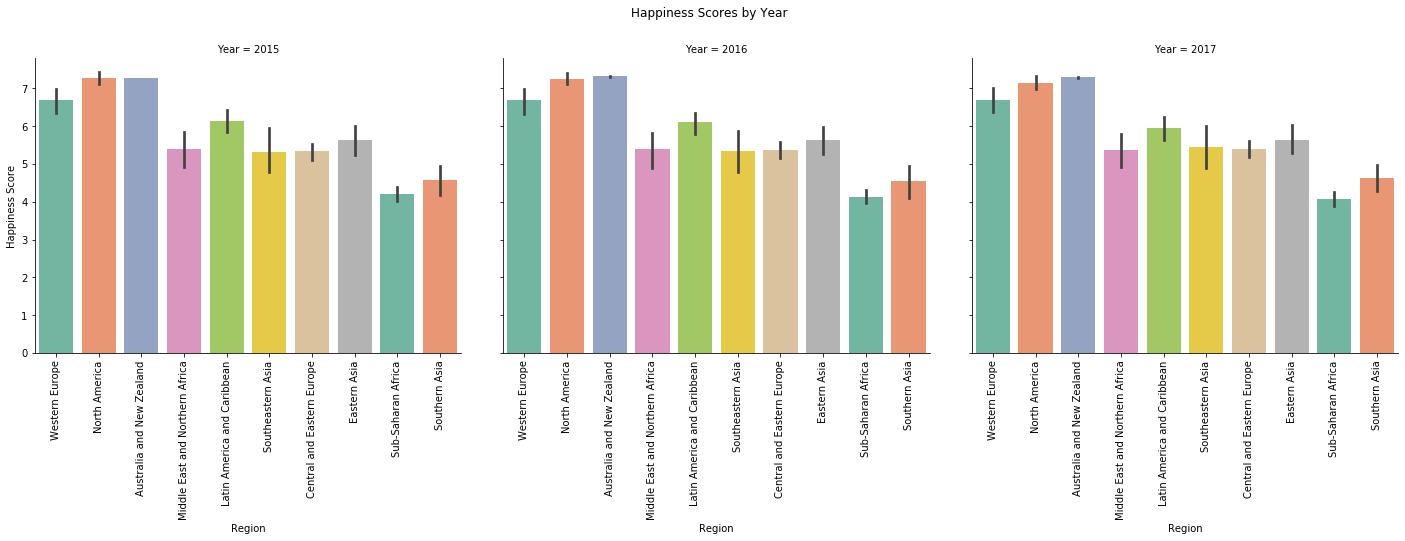

In [74]:
#Comparing Scores by Region over the years

g = sns.catplot(x="Region", y="Happiness Score", col="Year", palette='Set2',
                data=df_3, kind="bar",
                height=5.5, aspect=1.2)

g.set_xticklabels(rotation=90)

g.fig.subplots_adjust(top=0.85) # adjust the figure to fit in the title
g.fig.suptitle('Happiness Scores by Year');

In [75]:
df_3['Year'].value_counts(normalize=True)

2015    0.336170
2016    0.334043
2017    0.329787
Name: Year, dtype: float64

In [76]:
df_3['Year'].value_counts()

2015    158
2016    157
2017    155
Name: Year, dtype: int64

In [77]:
df_3['Region'].value_counts(dropna=False)

Sub-Saharan Africa                 114
Central and Eastern Europe          87
Latin America and Caribbean         67
Western Europe                      63
Middle East and Northern Africa     58
Southeastern Asia                   26
Southern Asia                       21
Eastern Asia                        18
North America                        6
Australia and New Zealand            6
NaN                                  4
Name: Region, dtype: int64

In [78]:
df_3.isna().sum()

Country                          0
Region                           4
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

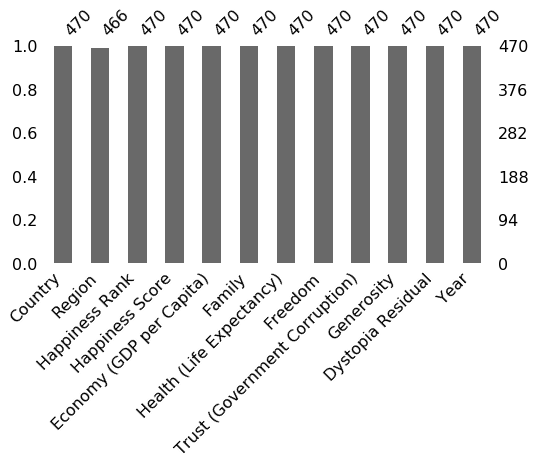

In [79]:
# Visual of the missing values
msno.bar(df_3, figsize=(8, 4))
plt.show()

#### Fixing the nulls in the Region column

In [80]:
df_3[df_3['Region'].isnull()] #shows rows with null values

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
364,Belize,NaN,50,5.956,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956,2017
407,Somalia,NaN,93,5.151,0.022643,0.721151,0.113989,0.602127,0.282410,0.291631,3.117485,2017
425,Namibia,NaN,111,4.574,0.964434,1.098471,0.338612,0.520304,0.093147,0.077134,1.481890,2017
461,South Sudan,NaN,147,3.591,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671,1.879567,2017


In [81]:
def replace(region):
    df_3.Region.mask(df_3.Country=='Belize', 'Latin America and Caribbean', inplace=True)
    df_3.Region.mask(df_3.Country=='Somalia', 'Sub-Saharan Africa', inplace=True)
    df_3.Region.mask(df_3.Country=='Namibia', 'Sub-Saharan Africa', inplace=True)
    df_3.Region.mask(df_3.Country=='South Sudan', 'Sub-Saharan Africa', inplace=True)
    return df_3.head()
    
# def replace(name):
#     return "valid" if name.strip()=="Salad" else np.NaN

# df['SaleTypeName'] = df.loc[:,'ProductName'].apply(lambda x: replace(x))

df_3['Region'].apply(replace)

0             Country          Region  Happiness Rank...
1             Country          Region  Happiness Rank...
2             Country          Region  Happiness Rank...
3             Country          Region  Happiness Rank...
4             Country          Region  Happiness Rank...
                             ...                        
465           Country          Region  Happiness Rank...
466           Country          Region  Happiness Rank...
467           Country          Region  Happiness Rank...
468           Country          Region  Happiness Rank...
469           Country          Region  Happiness Rank...
Name: Region, Length: 470, dtype: object

In [82]:
df_3[df_3['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year


In [83]:
df_3[df_3['Country'].str.contains('Belize')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
209,Belize,Latin America and Caribbean,52,5.956,0.876160,0.686550,0.455690,0.512310,0.107710,0.236840,3.080390,2016
364,Belize,Latin America and Caribbean,50,5.956,0.907975,1.081418,0.450192,0.547509,0.096581,0.240016,2.631956,2017


In [84]:
df_3.loc[df_3['Country'].str.contains('South Sudan')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
300,South Sudan,Sub-Saharan Africa,143,3.832,0.393940,0.185190,0.157810,0.196620,0.130150,0.258990,2.509290,2016
461,South Sudan,Sub-Saharan Africa,147,3.591,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671,1.879567,2017


In [85]:
df_3[df_3['Country'].str.contains('Namibia')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
270,Namibia,Sub-Saharan Africa,113,4.574,0.932870,0.703620,0.347450,0.486140,0.103980,0.077950,1.92198,2016
425,Namibia,Sub-Saharan Africa,111,4.574,0.964434,1.098471,0.338612,0.520304,0.093147,0.077134,1.48189,2017


In [86]:
df_3[df_3['Country'].str.contains('Somalia')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
233,Somalia,Sub-Saharan Africa,76,5.440,0.000000,0.336130,0.114660,0.567780,0.31180,0.272250,3.837720,2016
407,Somalia,Sub-Saharan Africa,93,5.151,0.022643,0.721151,0.113989,0.602127,0.28241,0.291631,3.117485,2017


In [87]:
df_3['Region'].isnull().sum()

0

In [88]:
df_3

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
465,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
466,Syria,Middle East and Northern Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017
467,Tanzania,Sub-Saharan Africa,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017
468,Burundi,Sub-Saharan Africa,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017


In [89]:
#Saving to csv
#df_3.to_csv('HappinessReport_2015to2017.csv', index=False)

## Inconsistencies in country data 

As we've already noticed the country data is not always consistent. The data for some of the countries is missing from one or more years. Because the discrepancies in country counts are not significant enough, these country discrepanies do not have a signifcant effect on the outcomes of this analysis. As such, no countries will be removed from the report - we will carry on with the awareness that some years have a wider range of observaations. <br/>

2015 data includes 158 countries, 2016 - 157 countries, and 2017 - 155 countries. <br/>

In [90]:
df_3.groupby(["Year"]).count()['Country']

Year
2015    158
2016    157
2017    155
Name: Country, dtype: int64

Let's take a look at the countries, for which the data is incomplete - these countries appear in some years, but missing in other years.

In [91]:
# Viewing countries, for which data is incomplete
df_3.groupby(["Country"]).count()['Year'].sort_values().head(20)

Country
Puerto Rico                 1
Oman                        1
Djibouti                    1
Swaziland                   1
Somaliland Region           2
Central African Republic    2
South Sudan                 2
Comoros                     2
Namibia                     2
Mozambique                  2
Belize                      2
Suriname                    2
Laos                        2
Lesotho                     2
Somalia                     2
Panama                      3
Paraguay                    3
Palestinian Territories     3
Peru                        3
Pakistan                    3
Name: Year, dtype: int64

**Country name inconsistencies throughout the years:<br/>**
(1) In 2017 report, 'Taiwan' updated its name to 'Taiwan Province of China' <br/>
(2) Belize did not appear in 2015 report<br/>
(3) Namibia did not appear in 2015 report<br/>
(4) Somalia appears in 2016 and 2017 data, but did not appear in 2015 report <br/>
(5) Somaliland did not appear in 2017 data, it appears only in 2015 and 2016 years. Somaliland is a self-declared sovereign state that is recognised as an autonomous region of Somalia by the international community<br/>
(6) In 2017 report, the country Hong Kong updated its name to 'Hong Kong S.A.R., China'<br/>
(7) In 2015 report, South Sudan is not included/missing. 2016 and 2017 reports included Sudan and South Sudan as two unique country names<br/>
(8) The following three countries show GDP of zero: Congo (Kinshasa) in 2015, Somalia in 2016,  Central African Republic in 2017<br/>
(9) These three counties show Family of zero 0: Central African Republic in 2015, Togo in 2016, Central African Republic in 2017<br/>
(10) These three countries show Life Expectancy of 0: Sierra Leone in 2015, Sierra Leone in 2016, Lesotho in 2017<br/>
(11) These three countries show Freedom of 0: Iraq in 2015, Sudan in 2016, Angola in 2017<br/>

## Happiness Scores by Region by Year

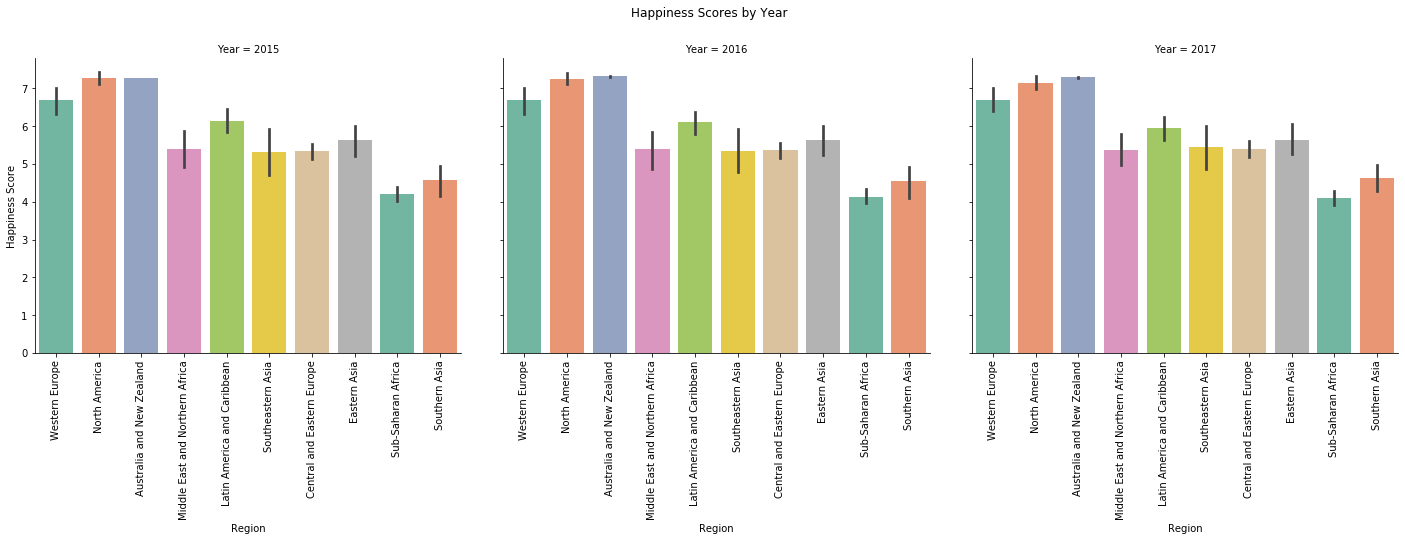

In [92]:
#Comparing Scores by Region over the years

g = sns.catplot(x="Region", y="Happiness Score", col="Year", palette='Set2',
                data=df_3, kind="bar",
                height=5.5, aspect=1.2)

g.set_xticklabels(rotation=90)

g.fig.subplots_adjust(top=0.85) # adjust the figure to fit in the title
g.fig.suptitle('Happiness Scores by Year');

This visual highlights that the Regional happiness scores have been similar from year to year, and there are no dramatic changes in the scores by Region.

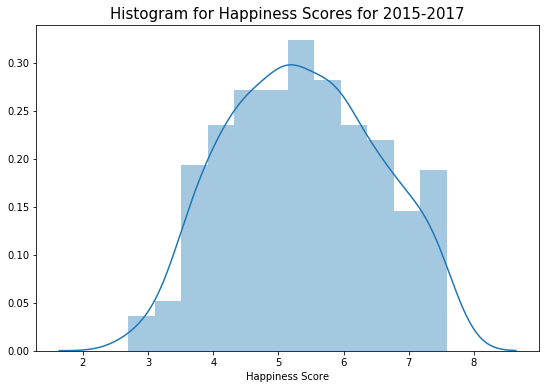

In [93]:
# Histogram of Happinness Scores
plt.figure(figsize=(9,6))

sns.distplot(df_3['Happiness Score'], bins=12, kde = True)

plt.title('Histogram for Happiness Scores for 2015-2017', fontsize=15);

The happiness score is normally distributed, with the mean value at 5.37, the minimum observed score is 2.693 and the maximum is 7.587.

In [94]:
# Summary view of the statistics including count, mean, standard deviation, min/max.
df_3.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,78.829787,5.370728,0.927830,0.990347,0.579968,0.402828,0.134790,0.242241,2.092717
std,45.281408,1.136998,0.415584,0.318707,0.240161,0.150356,0.111313,0.131543,0.565772
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.509000,0.605292,0.793000,0.402301,0.297615,0.059777,0.152831,1.737975
50%,79.000000,5.282500,0.995439,1.025665,0.630053,0.418347,0.099502,0.223140,2.094640
75%,118.000000,6.233750,1.252443,1.228745,0.768298,0.516850,0.173161,0.315824,2.455575
max,158.000000,7.587000,1.870766,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720


In [95]:
df_3.groupby('Region')['Happiness Score'].mean()

Region
Australia and New Zealand          7.302500
Central and Eastern Europe         5.371184
Eastern Asia                       5.632333
Latin America and Caribbean        6.069074
Middle East and Northern Africa    5.387879
North America                      7.227167
Southeastern Asia                  5.364077
Southern Asia                      4.590857
Sub-Saharan Africa                 4.150957
Western Europe                     6.693000
Name: Happiness Score, dtype: float64

## Mean Happiness Scores by Region

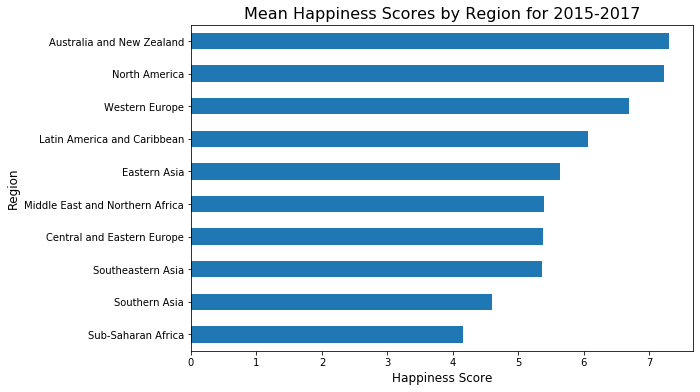

In [96]:
# Another view of mean happiness scores by region for all three years
plt.figure(figsize=(9,6))

plt.title('Mean Happiness Scores by Region for 2015-2017', fontsize=16)
plt.ylabel("Region", fontsize = 12)
plt.xlabel("Happiness Score", fontsize = 12)

df_3.groupby('Region')['Happiness Score'].mean().sort_values(ascending=True).plot(kind='barh');

This graph shows the mean happiness scores by region. In looking at this data, it is helpful to consider is the size of each region and the Happiness Score's standard deviation within the region. 

For intance, Sub Saharan Africa is the largest region and includes 40 countries, standard deviation of 0.58, with the min score of 2.693 and the max of 5.648. In contrast, the North America consists of only 2 countries, with 0.179 standard deviation in happiness scores. 

In [97]:
df_3.groupby('Region')['Country'].count().sort_values().to_frame()

,Country
Region,
Australia and New Zealand,6
North America,6
Eastern Asia,18
Southern Asia,21
Southeastern Asia,26
Middle East and Northern Africa,58
Western Europe,63
Latin America and Caribbean,68
Central and Eastern Europe,87


In [98]:
df_3.groupby('Region')['Happiness Score'].std().sort_values().to_frame()

,Happiness Score
Region,
Australia and New Zealand,0.020936
North America,0.179331
Eastern Asia,0.502100
Southern Asia,0.535978
Central and Eastern Europe,0.578274
Sub-Saharan Africa,0.584945
Latin America and Caribbean,0.728157
Western Europe,0.777886
Southeastern Asia,0.882637


### Sub-Saharan Africa Region

In [99]:
df_3[df_3['Region'] == "Sub-Saharan Africa"].groupby(['Year']).count()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Year,,,,,,,,,,,
2015,40,40,40,40,40,40,40,40,40,40,40
2016,38,38,38,38,38,38,38,38,38,38,38
2017,39,39,39,39,39,39,39,39,39,39,39


In [100]:
df_3[df_3['Region'] == 'Sub-Saharan Africa'].describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,128.461538,4.150957,0.451379,0.787394,0.249353,0.345589,0.114975,0.225650,1.976592
std,21.067436,0.584945,0.304772,0.299894,0.136563,0.137351,0.088875,0.082425,0.556586
min,64.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.025336,0.043785,0.377914
25%,116.000000,3.739000,0.239060,0.625420,0.159500,0.275440,0.066810,0.183354,1.651637
50%,133.000000,4.139000,0.375847,0.832044,0.257836,0.377922,0.093140,0.214880,1.949390
75%,144.000000,4.517000,0.630690,1.001200,0.341756,0.436530,0.125040,0.264815,2.306370
max,158.000000,5.648000,1.198210,1.384789,0.709500,0.602127,0.551910,0.514790,3.837720


In [101]:
df[df['Region'] == 'Sub-Saharan Africa'].sort_values(by='Happiness Score').head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
157,Togo,Sub-Saharan Africa,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,2015


### North America Region

In [102]:
df_3[df_3['Region'] == "North America"].groupby(['Year']).count()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Year,,,,,,,,,,,
2015,2,2,2,2,2,2,2,2,2,2,2
2016,2,2,2,2,2,2,2,2,2,2,2
2017,2,2,2,2,2,2,2,2,2,2,2


In [103]:
df_3[df_3['Region'] == 'North America'].describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,10.000000,7.227167,1.449062,1.269152,0.830477,0.558530,0.228908,0.424398,2.466653
std,4.472136,0.179331,0.079941,0.173227,0.049921,0.058977,0.090231,0.026748,0.231035
min,5.000000,6.993000,1.326290,1.047820,0.774287,0.481630,0.135639,0.392579,2.187264
25%,6.250000,7.107750,1.405920,1.133853,0.791150,0.515815,0.151235,0.403480,2.276525
50%,10.000000,7.217500,1.459677,1.284860,0.831079,0.559870,0.223136,0.423155,2.480935
75%,13.750000,7.382000,1.500771,1.395593,0.854982,0.601751,0.306810,0.445140,2.656165
max,15.000000,7.427000,1.546259,1.481349,0.905630,0.632970,0.329570,0.458110,2.727820


In [104]:
df_3[df_3['Region'] == 'North America'].sort_values(by='Happiness Score')

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
328,United States,North America,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113,2017
170,United States,North America,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820,2016
14,United States,North America,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110,2015
321,Canada,North America,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2.187264,2017
163,Canada,North America,6,7.404,1.440150,1.096100,0.827600,0.573700,0.313290,0.448340,2.704850,2016
4,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015


## Top 10 Happiest Countries

It is an interesting obseration, but the top 10 countries remained the same for these three years between 2015-2017. 

In [105]:
top10 = df_3[(df_3['Happiness Rank'] <= 10)] 
top10

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
1,Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
2,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
3,Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
4,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
5,Finland,Western Europe,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550,2015
6,Netherlands,Western Europe,7,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700,2015
7,Sweden,Western Europe,8,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250,2015
9,Australia,Australia and New Zealand,10,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460,2015


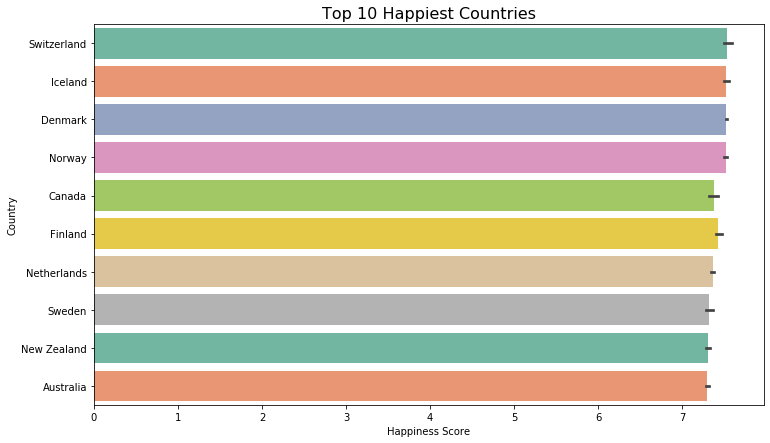

In [106]:
plt.figure(figsize=(12,7))

ax = sns.barplot(x='Happiness Score', y='Country', data=top10, palette='Set2')
plt.title('Top 10 Happiest Countries', fontsize = 16);
ax.set_xlabel('Happiness Score');

The gragh shows top 10 Happiest countries in 2015-2017.

## What factors have the strongest effect on the Happiness Scores?

### Correlation Map

The correlation heatmaps show that Economy and Health (Life Expectancy) are two factors that have the strongest correlation to the Happiness Score, with correlations calculated at 0.79 and 0.75. These two factors are followed by Family, Freedom, Trust in Government and Generosity, with a lot weaker correlations to the scores: Family 0.64, Freedom 0.56, Trust in Government 0.41, and Generosity 0.16.

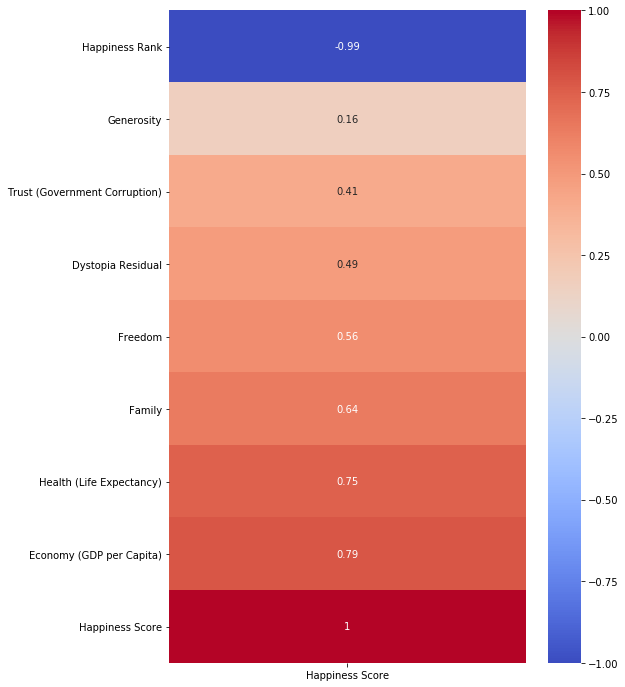

In [107]:
plt.figure(figsize=(8,12))

sns.heatmap(df_3.corr()[['Happiness Score']].sort_values('Happiness Score'), 
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1);

And the heatmap below shows the correlation between the factors.

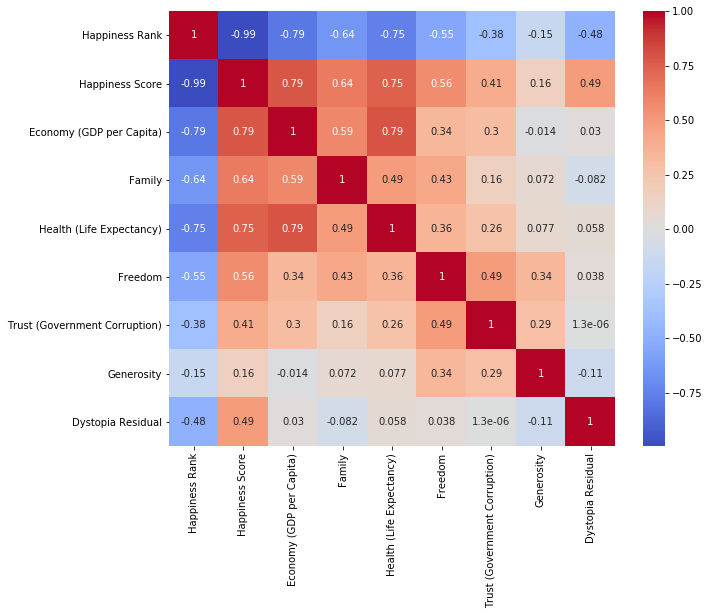

In [108]:
plt.subplots(figsize=(10,8))

sns.heatmap(df_3.corr(),cmap='coolwarm',annot=True);

Let's view the relationship between the variables like Economy (GDP per capita) and Family to Happinnes Scores with the help of scatter plots.

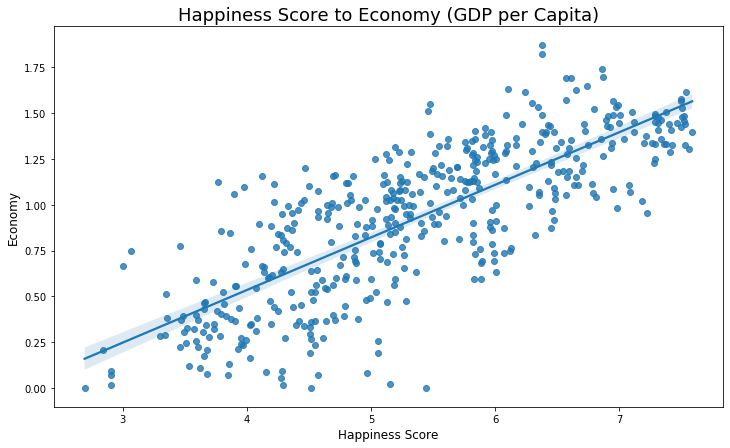

In [109]:
plt.figure(figsize=(12, 7))
ax = sns.regplot(x="Happiness Score", y="Economy (GDP per Capita)", data=df_3)

plt.title("Happiness Score to Economy (GDP per Capita)", fontsize = 18)
plt.ylabel("Economy", fontsize = 12)
plt.xlabel("Happiness Score", fontsize = 12);

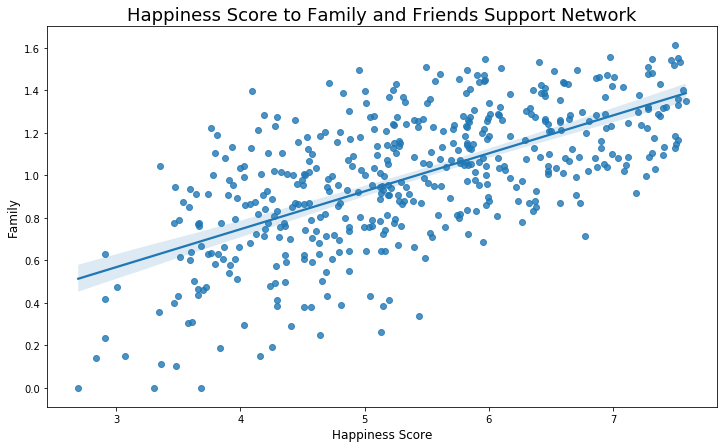

In [110]:
plt.figure(figsize=(12, 7))
ax = sns.regplot(x="Happiness Score", y="Family", data=df_3)

plt.title("Happiness Score to Family and Friends Support Network", fontsize = 18)
plt.ylabel("Family", fontsize = 12)
plt.xlabel("Happiness Score", fontsize = 12);

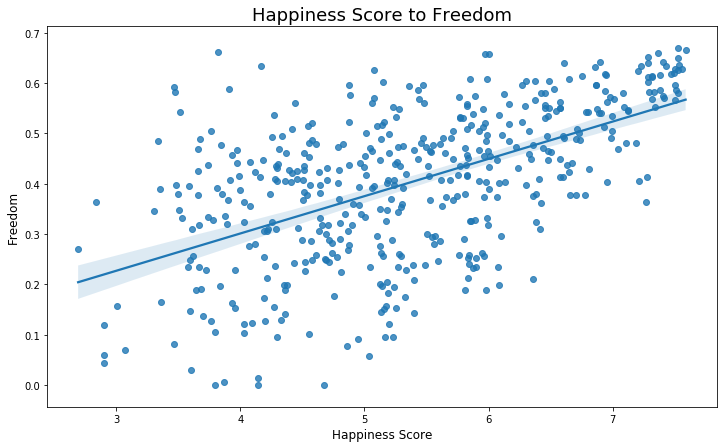

In [111]:
plt.figure(figsize=(12, 7))
ax = sns.regplot(x="Happiness Score", y="Freedom", data=df_3)

plt.title("Happiness Score to Freedom", fontsize = 18)
plt.ylabel("Freedom", fontsize = 12)
plt.xlabel("Happiness Score", fontsize = 12);

In [112]:
df_3.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

### A look at some countries 

In [113]:
df_3[df_3['Country'].str.contains('Denmark')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
2,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.48357,0.34139,2.492040,2015
158,Denmark,Western Europe,1,7.526,1.441780,1.163740,0.795040,0.579410,0.44453,0.36171,2.739390,2016
316,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.40077,0.35528,2.313707,2017


In [114]:
df_3[df_3['Country'].str.contains('France')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
28,France,Western Europe,29,6.575,1.277780,1.260380,0.945790,0.550110,0.206460,0.123320,2.211260,2015
189,France,Western Europe,32,6.478,1.394880,1.005080,0.837950,0.465620,0.178080,0.121600,2.474400,2016
345,France,Western Europe,31,6.442,1.430923,1.387777,0.844466,0.470222,0.172502,0.129762,2.005955,2017


In [115]:
df_3[df_3['Country'].str.contains('Mexico')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
13,Mexico,Latin America and Caribbean,14,7.187,1.020540,0.914510,0.814440,0.48181,0.213120,0.14074,3.602140,2015
178,Mexico,Latin America and Caribbean,21,6.778,1.115080,0.714600,0.711430,0.37709,0.183550,0.11735,3.559060,2016
339,Mexico,Latin America and Caribbean,25,6.578,1.153184,1.210862,0.709979,0.41273,0.132774,0.12099,2.837155,2017


In [116]:
df_3[df_3['Country'].str.contains('Canada')]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
4,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.45811,2.451760,2015
163,Canada,North America,6,7.404,1.440150,1.096100,0.827600,0.573700,0.313290,0.44834,2.704850,2016
321,Canada,North America,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.43554,2.187264,2017


In [117]:
df_3[df_3['Country'] == 'United States']

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
14,United States,North America,15,7.119,1.394510,1.247110,0.861790,0.546040,0.158900,0.401050,2.510110,2015
170,United States,North America,13,7.104,1.507960,1.047820,0.779000,0.481630,0.148680,0.410770,2.727820,2016
328,United States,North America,14,6.993,1.546259,1.419921,0.774287,0.505741,0.135639,0.392579,2.218113,2017


In [118]:
df_3[df_3['Country'] == 'Somalia']

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
233,Somalia,Sub-Saharan Africa,76,5.440,0.000000,0.336130,0.114660,0.567780,0.31180,0.272250,3.837720,2016
407,Somalia,Sub-Saharan Africa,93,5.151,0.022643,0.721151,0.113989,0.602127,0.28241,0.291631,3.117485,2017


## Clusters of values with K-Means clustering

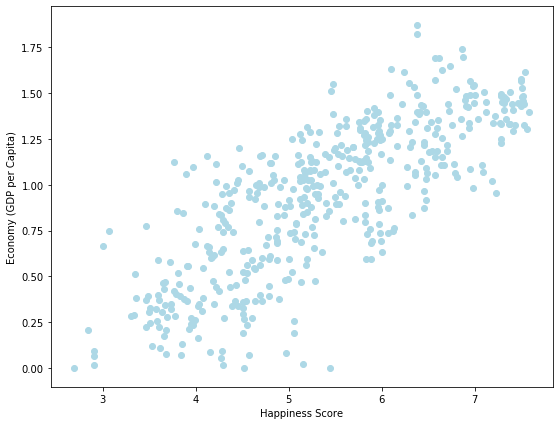

In [119]:
X = df_3[["Happiness Score","Economy (GDP per Capita)"]]
plt.figure(figsize=(9, 7))
plt.scatter(X["Happiness Score"],X["Economy (GDP per Capita)"],c='lightblue')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

In [120]:
for col in df_3.columns: 
    print(col) 

Country
Region
Happiness Rank
Happiness Score
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual
Year


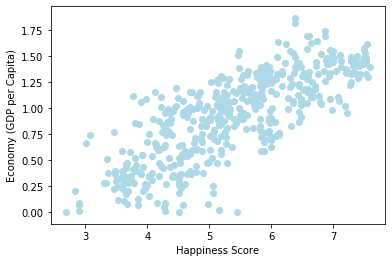

In [121]:
X1 = df_3[["Happiness Score","Economy (GDP per Capita)"]]
plt.scatter(X1["Happiness Score"],X1["Economy (GDP per Capita)"],c='lightblue')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.show()

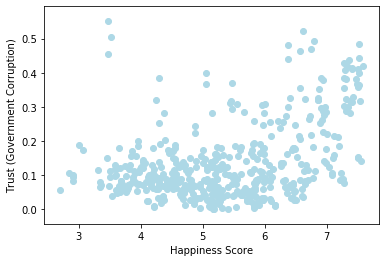

In [122]:
X2 = df_3[["Happiness Score","Trust (Government Corruption)"]]
plt.scatter(X2["Happiness Score"],X2["Trust (Government Corruption)"],c='lightblue')
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.show()

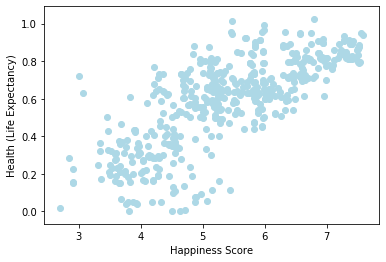

In [123]:
X3 = df_3[["Happiness Score","Health (Life Expectancy)"]]
plt.scatter(X3["Happiness Score"],X3["Health (Life Expectancy)"],c='lightblue')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.show()

In [124]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.4645     0.99716069]
 [4.10808228 0.51930393]
 [6.83741129 1.34325726]]


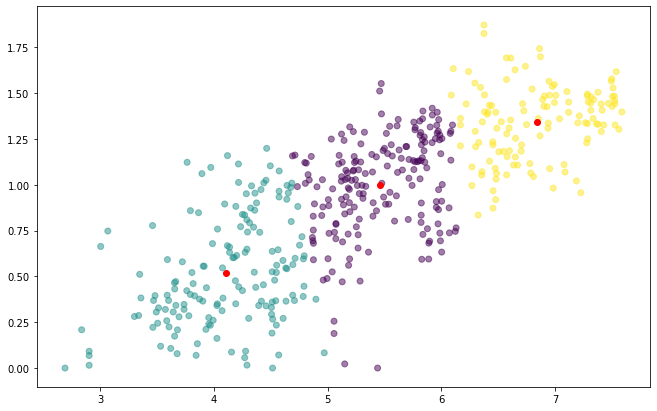

In [125]:
plt.figure(figsize=(11, 7))

plt.scatter(X['Happiness Score'], X['Economy (GDP per Capita)'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

If we were to further explore the relationship between, for example, the Economy and the Happines Scoores, and wanted to see how the points are spread out and where they may be concentrated... For that, we would group all points in Economy vs Happiness Scores into several most dense subgroups/clusters concentrated arount the means within each subgroup, this graph shows us precisely that. The red centroid points represent the means within each cluster.